# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images.

*Note: All images come from the [AMOS dataset](https://mvrl.cse.wustl.edu/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [ ]:
!rm -rf DL_Data_sets/
!git clone --branch images https://github.com/octavio-navarro/DL_Data_sets.git

Cloning into 'DL_Data_sets'...
remote: Enumerating objects: 64969, done.
remote: Counting objects: 100% (500/500), done.
remote: Compressing objects: 100% (491/491), done.
remote: Total 64969 (delta 13), reused 493 (delta 9), pack-reused 64469 (from 1)
Receiving objects: 100% (64969/64969), 1.54 GiB | 30.75 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [ ]:
import cv2
import os, glob

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets.

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

- image_dir_training: the directory where our training image data is stored
- image_dir_test: the directory where our test image data is stored

In [ ]:
# Image data directories
image_dir_training = "DL_Data_sets/images/day_night_images/training/"
image_dir_test = "DL_Data_sets/images/day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night").

This function loads in images and their labels and places them in a list. The list contains all images and their associated labels. For example, after data is loaded, im_list[0][:] will be the first image-label pair in the list

In [ ]:
def load_dataset(image_dir):

    # Populate this empty image list
    im_list = []
    image_types = ["day", "night"]

    # Iterate through each color folder
    for im_type in image_types:

        # Iterate through each image file in each image_type folder
        # glob reads in any image with the extension "image_dir/im_type/*"
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):

            # Read in the image
            im = cv2.imread(file)

            # Check if the image exists/if it's been correctly read-in
            if not im is None:
                # Append the image, and it's type (red, green, yellow) to the image list
                im_list.append((im, im_type))

    return im_list

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index:
``` IMAGE_LIST[0][:]```.

In [ ]:
# Load training data
IMAGE_LIST = load_dataset(image_dir_training)

In [ ]:
print(len(IMAGE_LIST))  # Check the length of the list
print(IMAGE_LIST)  # Check the contents of IMAGE_LIST

Se han truncado las últimas 5000 líneas del flujo de salida.

       [[ 42,  52,  52],
        [ 38,  50,  50],
        [ 31,  41,  41],
        ...,
        [ 79,  96,  85],
        [ 82,  99,  88],
        [ 61,  78,  67]]], dtype=uint8), 'night'), (array([[[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[75, 80, 48],
        [69, 74, 42],
        [65, 72, 39],
        ...,
        [ 0,  2,  7],
        [ 0,  2,  7],
        [ 0,  2,  7]],

       [[75, 80, 48],
        [69, 74, 42],
        [65, 72, 39],
        ...,
        [ 0,  4,  9],
        [ 0,  3,  8],
        [ 0,  3,  8]],



## Visualize sample day and night images

In [ ]:
# Select an image and its label by list index
image_index = 6
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

## TODO: Create a subplot of a day image and a night image. The titles should consist of the shape and label
# of the image

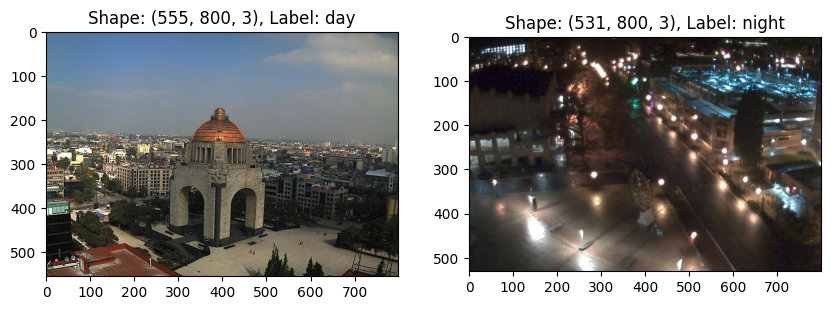

In [ ]:
import matplotlib.pyplot as plt

# Encuentra los índices de una imagen de día y una de noche
day_index = [i for i, (image, label) in enumerate(IMAGE_LIST) if label == "day"][0]
night_index = [i for i, (image, label) in enumerate(IMAGE_LIST) if label == "night"][0]


# Obtén las imágenes y etiquetas
day_image = IMAGE_LIST[day_index][0]
day_label = IMAGE_LIST[day_index][1]
night_image = IMAGE_LIST[night_index][0]
night_label = IMAGE_LIST[night_index][1]

# Crea un subplot con 1 fila y 2 columnas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Muestra la imagen de día en el primer subplot
ax1.imshow(cv2.cvtColor(day_image, cv2.COLOR_BGR2RGB))
ax1.set_title(f"Shape: {day_image.shape}, Label: {day_label}")

# Muestra la imagen de noche en el segundo subplot
ax2.imshow(cv2.cvtColor(night_image, cv2.COLOR_BGR2RGB))
ax2.set_title(f"Shape: {night_image.shape}, Label: {night_label}")

# Muestra el subplot
plt.show()

## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

In [ ]:
## Standardize the output using both functions above, standardize the input images and output labels
def standardize(image_list):

    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image, label = item  # Desempaqueta la tupla (imagen, etiqueta)

        # Resize the image to a specific width and height using cv2.resize
        image = cv2.resize(image, (110,110))

        # Create a numerical label based on the string label of the image: day should be 1, night should be 0
        numerical_label = 1 if label == "day" else 0

        # Append the image, and it's label to the full, processed list of image data
        standard_list.append((image, numerical_label))


    return standard_list

In [ ]:
# Standardize all training images

STANDARDIZED_LIST = standardize(IMAGE_LIST)

In [ ]:
print(len(STANDARDIZED_LIST))  # Check the length of the list
print(STANDARDIZED_LIST)  # Check the contents of IMAGE_LIST

240
[(array([[[153, 120,  81],
        [153, 120,  81],
        [152, 119,  80],
        ...,
        [117, 103,  82],
        [113,  99,  77],
        [115, 101,  79]],

       [[154, 121,  82],
        [156, 123,  84],
        [152, 119,  80],
        ...,
        [119, 104,  78],
        [121, 107,  85],
        [115, 101,  79]],

       [[157, 124,  85],
        [156, 123,  84],
        [154, 121,  82],
        ...,
        [115, 106,  83],
        [117, 103,  81],
        [118, 104,  82]],

       ...,

       [[  1,   3,   9],
        [ 77,  74,  99],
        [ 38,  48,  68],
        ...,
        [ 38,  44,  43],
        [ 80,  98, 104],
        [ 71,  90,  97]],

       [[ 89, 105, 122],
        [ 58,  73,  93],
        [ 76,  92, 115],
        ...,
        [ 65,  82,  89],
        [ 20,  33,  41],
        [ 76,  90,  98]],

       [[ 35,  50,  82],
        [ 50,  65,  99],
        [ 41,  53,  87],
        ...,
        [ 76,  94, 101],
        [ 76,  89,  98],
        [ 66,  79,

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST.

Shape: ((110, 110, 3))
Label [1 = day, 0 = night]: 1


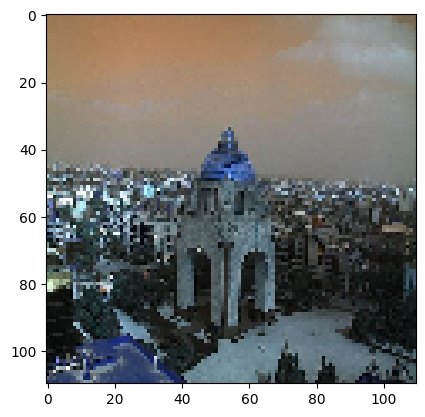

In [ ]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print(f"Shape: ({selected_image.shape})")
print(f"Label [1 = day, 0 = night]: {selected_label}")

# Feature Extraction
---

Create a feature that best represents a day or night image. Preprocess the image as you see fit.


In [ ]:
def feature_extraction(rgb_image):
    ## TODO: Get the relevant feature(s) of an image
    # Convertir la imagen de RGB a escala de grises
    gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)

    # Calcular el brillo promedio de la imagen
    avg_brightness = np.mean(gray_image)

    return avg_brightness

# Classification and Visualizing Error

In this section, we'll turn feature into a classifier that takes in a standardized image and returns a `predicted_label` for that image. This `estimate_label` function should return a value: 0 or 1 (night or day, respectively).

---
### Build a complete classifier

Propose a classifier, and use it to create a model that classifies images into night and day. Include metrics that evaluate the performance of your model.

In [ ]:
# TODO: Create a classifier for the night and day images. Include plots to show the metrics of the perfomance of the model.
def estimate_label(rgb_image, threshold=127):
    # Extraer la característica de brillo promedio
    avg_brightness = feature_extraction(rgb_image)

    # Clasificar la imagen usando el umbral
    predicted_label = 1 if avg_brightness > threshold else 0

    return predicted_label

## Testing the classifier

Here is where we test your classification algorithm using our test set of data that we set aside at the beginning of the notebook.

### Test dataset

Below, we load in the test dataset, standardize it using the `standardize` function you defined above, and then **shuffle** it; this ensures that order will not play a role in testing accuracy.


In [ ]:
import random

# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = load_dataset(image_dir_test)

# Standardize the test data
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

Test your model on all the images from the test data. Add all the misclassified images to a new list.

In [ ]:
# TODO: Test your model and save the misclasified images to a new list.
# Inicializar una lista vacía para almacenar las imágenes mal clasificadas
MISCLASSIFIED = []

# Iterar sobre todas las imágenes en el conjunto de datos de prueba
for image, label in STANDARDIZED_TEST_LIST:
    # Obtener la etiqueta predicha por el clasificador
    predicted_label = estimate_label(image)

    # Si la etiqueta predicha es diferente de la etiqueta real, agregar la imagen a la lista de mal clasificadas
    if predicted_label != label:
        MISCLASSIFIED.append((image, label, predicted_label))  # Agrega la imagen, la etiqueta real y la etiqueta predicha

---
### Visualize the misclassified images

Visualize some of the images you classified wrong (in the `MISCLASSIFIED` list) and note any qualities that make them difficult to classify.

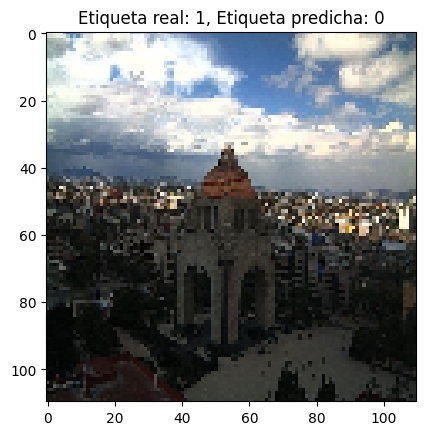

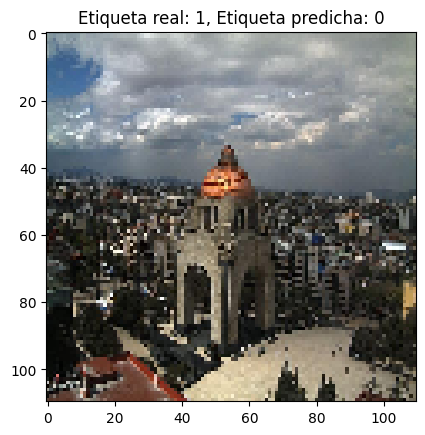

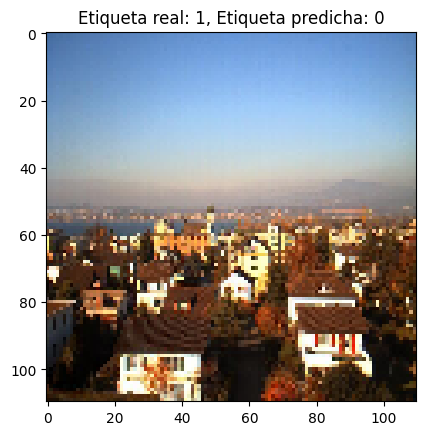

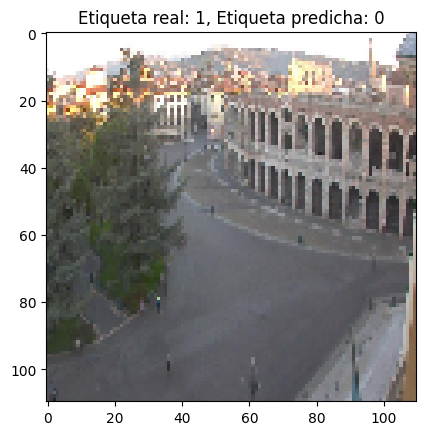

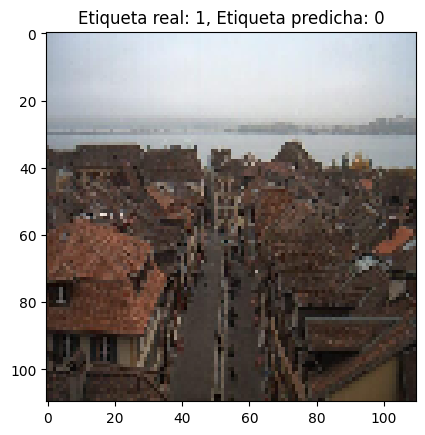

In [ ]:
# Visualize misclassified example(s)
## TODO: Display an image in the `MISCLASSIFIED` list
## TODO: Print out its predicted label - to see what the image *was* incorrectly classified ass
import matplotlib.pyplot as plt

# Mostrar las primeras N imágenes mal clasificadas (puedes ajustar N)
N = 5

# Iterar sobre las primeras N imágenes en la lista MISCLASSIFIED
for i in range(min(N, len(MISCLASSIFIED))):
    image, label, predicted_label = MISCLASSIFIED[i]

    # Mostrar la imagen
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB para mostrar correctamente con matplotlib
    plt.title(f"Etiqueta real: {label}, Etiqueta predicha: {predicted_label}")
    plt.show()


+ Brillo ambiguo: Algunas imágenes podrían tener un brillo promedio que está cerca del umbral.
+ Presencia de elementos brillantes/oscuros: Las imágenes podrían contener elementos que son inusualmente brillantes u oscuros para su clase.
+ Variaciones en la iluminación: Las condiciones de iluminación pueden variar significativamente entre las imágenes, lo que afecta el brillo promedio.

